# 0-vanilla

Creates the most simple autoencoder.

input_dims is an integer containing the dimensions of the model input

hidden_layers is a list containing the number of nodes for each hidden layer in the encoder, respectively

the hidden layers should be reversed for the decoder

latent_dims is an integer containing the dimensions of the latent space representation

Returns: encoder, decoder, auto
encoder is the encoder model
decoder is the decoder model
auto is the full autoencoder model

The autoencoder model should be compiled using adam optimization and binary cross-entropy loss

All layers should use a relu activation except for the last layer in the decoder, which should use sigmoid

In [1]:
#!/usr/bin/env python3
"""
Vanilla autoencoder
"""

import tensorflow.keras as keras


def autoencoder(input_dim, hidden_layers, latent_dim):
    """
    Makes a vanilla autoencoder
    """
    encoder_input = keras.layers.Input(shape=(input_dim,))
    encoder_output = encoder_input
    
    for units in hidden_layers:
        encoder_output = keras.layers.Dense(
            units, activation='relu'
        )(encoder_output)
    
    latent_space = keras.layers.Dense(
        latent_dim, activation='relu'
    )(encoder_output)
    encoder = keras.models.Model(encoder_input, latent_space)
    
    decoder_input = keras.layers.Input(shape=(latent_dim,))
    decoder_output = decoder_input
    
    for units in reversed(hidden_layers):
        decoder_output = keras.layers.Dense(
            units, activation='relu'
        )(decoder_output)
    
    decoder_output = keras.layers.Dense(
        input_dim, activation='sigmoid'
    )(decoder_output)
    decoder = keras.models.Model(decoder_input, decoder_output)
    
    auto_out = encoder(encoder_input)
    auto_out = decoder(auto_out)
    autoenc = keras.models.Model(encoder_input, auto_out)
    autoenc.compile(optimizer='adam', loss='binary_crossentropy')
    
    return encoder, decoder, autoenc


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4569 - val_loss: 0.3176
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3109 - val_loss: 0.3054
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3015 - val_loss: 0.3002
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2969 - val_loss: 0.2970
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2940 - val_loss: 0.2952
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4.7716208
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


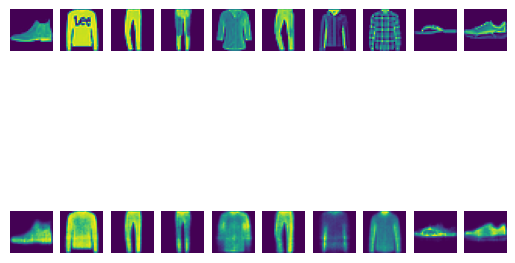

In [2]:
# Main file

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist


autoencoder = autoencoder

# (x_train, _), (x_test, _) = mnist.load_data()
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
np.random.seed(0)
tf.random.set_seed(0)
encoder, decoder, auto = autoencoder(784, [128, 64], 32)
auto.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i].reshape((28, 28)))
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i].reshape((28, 28)))
plt.show()

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.6571 - val_loss: 0.6130
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6058 - val_loss: 0.6007
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5995 - val_loss: 0.5962
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5938 - val_loss: 0.5917
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5899 - val_loss: 0.5898
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5878 - val_loss: 0.5876
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5862 - val_loss: 0.5861
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5843 - val_loss: 0.5848
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.5832 - val_loss: 0.5837
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.5817 - val_loss: 0.5823
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
0.7578551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


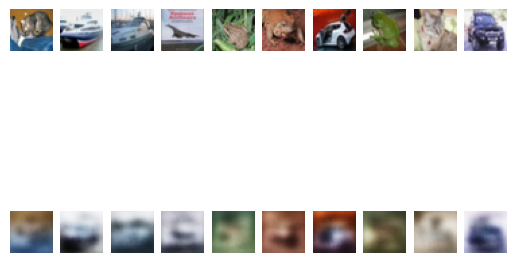

In [3]:
# output with cifar10 file

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((-1, 32 * 32 * 3))
x_test = x_test.reshape((-1, 32 * 32 * 3))

np.random.seed(0)
tf.random.set_seed(0)

# Build the autoencoder with the appropriate input size (32*32*3 = 3072)
encoder, decoder, auto = autoencoder(3072, [512, 256], 128)

auto.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True,
         validation_data=(x_test, x_test))

encoded = encoder.predict(x_test[:10])

print(np.mean(encoded))

reconstructed = decoder.predict(encoded)

# Plot original vs reconstructed images
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i].reshape((32, 32, 3)))  # Original image

    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i].reshape((32, 32, 3)))  # Reconstructed image

plt.show()


# Task 1, Sparce autoencoder

Write a function def autoencoder(input_dims, hidden_layers, latent_dims, lambtha): that creates a sparse autoencoder:

input_dims is an integer containing the dimensions of the model input

hidden_layers is a list containing the number of nodes for each hidden layer in the encoder, respectively

the hidden layers should be reversed for the decoder

latent_dims is an integer containing the dimensions of the latent space representation

lambtha is the regularization parameter used for L1 regularization on the encoded output

Returns: encoder, decoder, auto

encoder is the encoder model
decoder is the decoder model
auto is the sparse autoencoder model
The sparse autoencoder model should be compiled using adam optimization and binary cross-entropy loss

All layers should use a relu activation except for the last layer in the decoder, which should use sigmoid

In [4]:
#!/usr/bin/env python3
"""
Sparse autoencoder
"""

import tensorflow.keras as keras


def autoencoder(input_dim, hidden_layers, latent_dim, lambtha):
    """
    Makes a sparse autoencoder
    """
    encoder_input = keras.layers.Input(shape=(input_dim,))
    encoder_output = encoder_input
    
    for units in hidden_layers:
        encoder_output = keras.layers.Dense(
            units, activation='relu'
        )(encoder_output)
    
    latent_space = keras.layers.Dense(
        latent_dim, activation='relu',
        activity_regularizer = keras.regularizers.l1(lambtha)
    )(encoder_output)
    encoder = keras.models.Model(encoder_input, latent_space)
    
    decoder_input = keras.layers.Input(shape=(latent_dim,))
    decoder_output = decoder_input
    
    for units in reversed(hidden_layers):
        decoder_output = keras.layers.Dense(
            units, activation='relu'
        )(decoder_output)
    
    decoder_output = keras.layers.Dense(
        input_dim, activation='sigmoid'
    )(decoder_output)
    decoder = keras.models.Model(decoder_input, decoder_output)
    
    auto_out = encoder(encoder_input)
    auto_out = decoder(auto_out)
    autoenc = keras.models.Model(encoder_input, auto_out)
    autoenc.compile(optimizer='adam', loss='binary_crossentropy')
    
    return encoder, decoder, autoenc


Epoch 1/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3987 - val_loss: 0.2313
Epoch 2/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2253 - val_loss: 0.2081
Epoch 3/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2045 - val_loss: 0.1877
Epoch 4/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1861 - val_loss: 0.1773
Epoch 5/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1764 - val_loss: 0.1686
Epoch 6/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1674 - val_loss: 0.1605
Epoch 7/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1610 - val_loss: 0.1573
Epoch 8/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1577 - val_loss: 0.1549
Epoch 9/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1553 - val_loss: 0.1526
Epoch 10/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1532 - val_loss: 0.1507
Epoch 11/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1514 - val_loss: 0.1489
Epoch 12/35
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

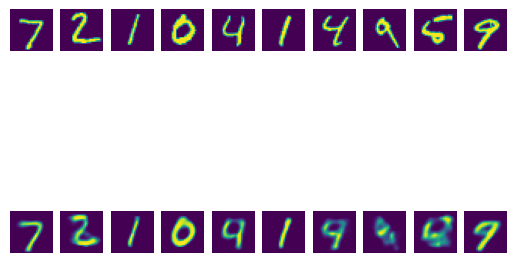

In [5]:
# main file

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

autoencoder = autoencoder

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
np.random.seed(0)
tf.random.set_seed(0)

encoder, decoder, auto = autoencoder(784, [128, 64], 32, 10e-6)
auto.fit(x_train, x_train, epochs=35,batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i].reshape((28, 28)))
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i].reshape((28, 28)))

# Task 2, Convolutional Autoencoders


* Write a function def autoencoder(input_dims, filters, latent_dims): that creates a convolutional autoencoder:

* input_dims is a tuple of integers containing the dimensions of the model input

* filters is a list containing the number of filters for each convolutional layer in the encoder, respectively

* the filters should be reversed for the decoder

* latent_dims is a tuple of integers containing the dimensions of the latent space representation

* Each convolution in the encoder should use a kernel size of (3, 3) with same padding and relu activation, followed by max pooling of size (2, 2)

* Each convolution in the decoder, except for the last two, should use a filter size of (3, 3) with same padding and relu activation, followed by upsampling of size (2, 2)

* The second to last convolution should instead use valid padding

* The last convolution should have the same number of filters as the number of channels in input_dims with sigmoid activation and no upsampling

Returns: encoder, decoder, auto

* encoder is the encoder model
* decoder is the decoder model
* auto is the full autoencoder model

The autoencoder model should be compiled using adam optimization and binary cross-entropy loss

In [13]:
#!/usr/bin/env python3
"""
Convolutional autoencoder
"""

import tensorflow.keras as keras


def autoencoder(input_dims, filters, latent_dims):
    """
    Makes a convolutional autoencoder
    """
    layers = keras.layers
    encoder_input = keras.layers.Input(shape=input_dims)
    encoder_output = encoder_input
    
    for f in filters:
        encoder_output = layers.Convolution2D(
            f, (3, 3), activation='relu', padding='same'
        )(encoder_output)
        encoder_output = layers.MaxPooling2D(
            (2, 2), padding='same'
        )(encoder_output)
    
    encoder = keras.models.Model(encoder_input, encoder_output)
    
    decoder_input = keras.layers.Input(shape=latent_dims)
    decoder_output = decoder_input
    
    for f in reversed(filters):
        decoder_output = layers.Convolution2D(
            f, (3, 3), activation='relu', padding='same'
        )(decoder_output)
        decoder_output = layers.UpSampling2D(size=(2, 2))(decoder_output)
    
    decoder_output = layers.Convolution2D(
        filters[0], (3, 3),
        activation='relu'
    )(decoder_output)
    decoder_output = layers.UpSampling2D(size=(2, 2))(decoder_output)
    decoder_output = layers.Convolution2D(
        input_dims[-1], (3, 3), padding='same',
        activation='sigmoid'
    )(decoder_output)
    
    decoder = keras.models.Model(decoder_input, decoder_output)
    
    auto_out = encoder(encoder_input)
    auto_out = decoder(auto_out)
    autoenc = keras.models.Model(encoder_input, auto_out)
    autoenc.compile(optimizer='adam', loss='binary_crossentropy')
    
    return encoder, decoder, autoenc


In [14]:
# main file


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

autoencoder = autoencoder

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print(x_train.shape)
print(x_test.shape)
np.random.seed(0)
tf.random.set_seed(0)
encoder, decoder, auto = autoencoder((28, 28, 1), [16, 8, 8], (4, 4, 8))
auto.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)[:,:,:,0]

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i,:,:,0])
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i])
plt.show()

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 28, 28, 1), output.shape=(None, 60, 60, 1)